https://www.kaggle.com/datasets/samira1992/credit-card-data-intermediate-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv("Customer_data.csv")

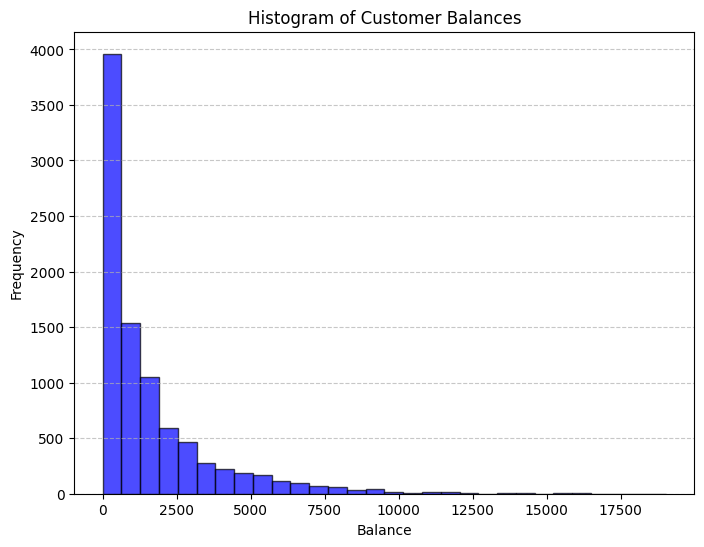

In [3]:
# Function 1: Histogram for "BALANCE"
def plot_balance_histogram(data):
    plt.figure(figsize=(8, 6))
    plt.hist(data["BALANCE"], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title("Histogram of Customer Balances")
    plt.xlabel("Balance")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_balance_histogram(data)

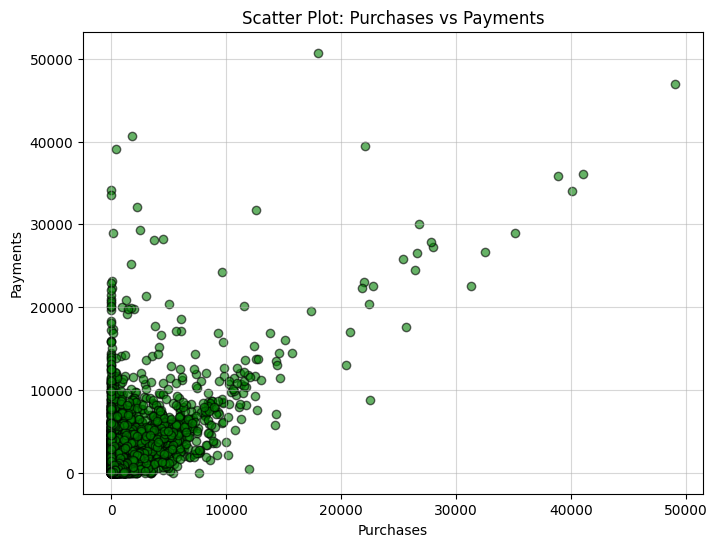

In [4]:
# Function 2: Scatter plot for "PURCHASES" vs "PAYMENTS"
def scatter_purchases_vs_payments(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["PURCHASES"], data["PAYMENTS"], alpha=0.6, c='green', edgecolor='k')
    plt.title("Scatter Plot: Purchases vs Payments")
    plt.xlabel("Purchases")
    plt.ylabel("Payments")
    plt.grid(alpha=0.5)
    plt.show()

scatter_purchases_vs_payments(data)

C:\Users\bikas\AppData\Local\Temp\ipykernel_9768\3140665076.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


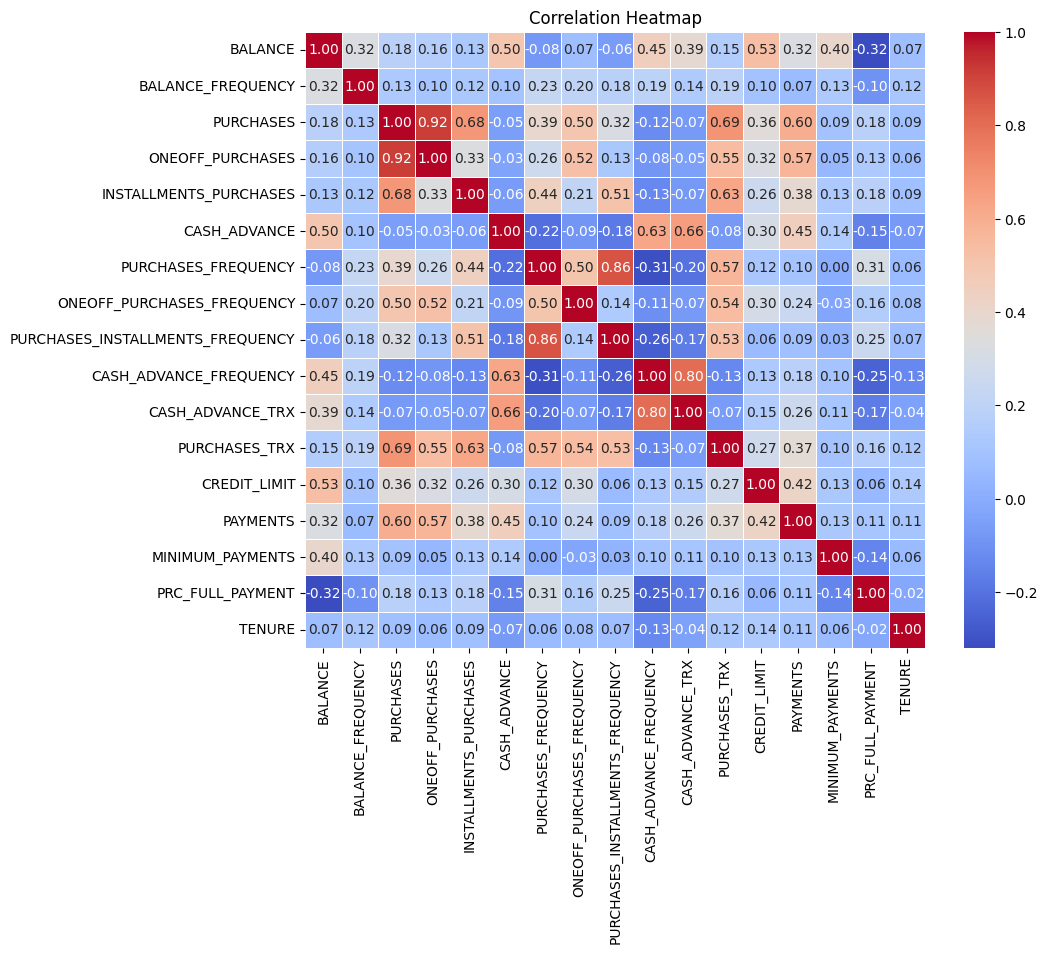

In [5]:
# Function 3: Heatmap of correlation matrix
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(data)

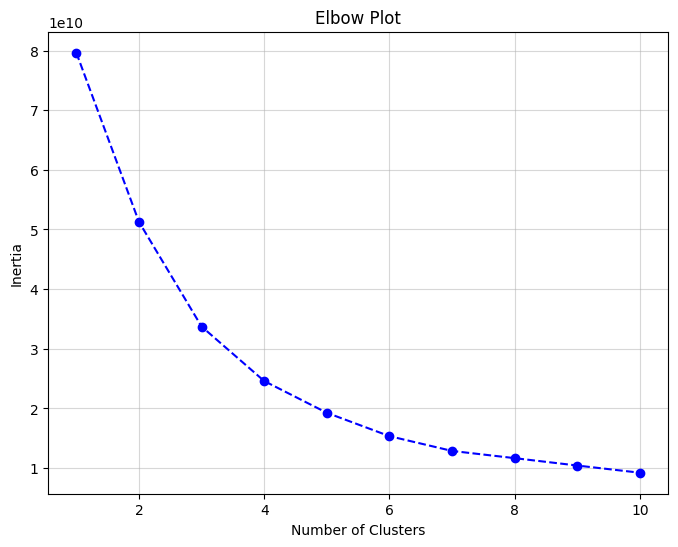

In [6]:

# Function 4: Elbow plot for k-means clustering
def plot_elbow_method(data, features):
    X = data[features].dropna()
    distortions = []
    range_n_clusters = range(1, 11)
    for k in range_n_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range_n_clusters, distortions, marker='o', linestyle='--', color='b')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(alpha=0.5)
    plt.show()

features_for_clustering = ["BALANCE", "PURCHASES"]
plot_elbow_method(data, features_for_clustering)

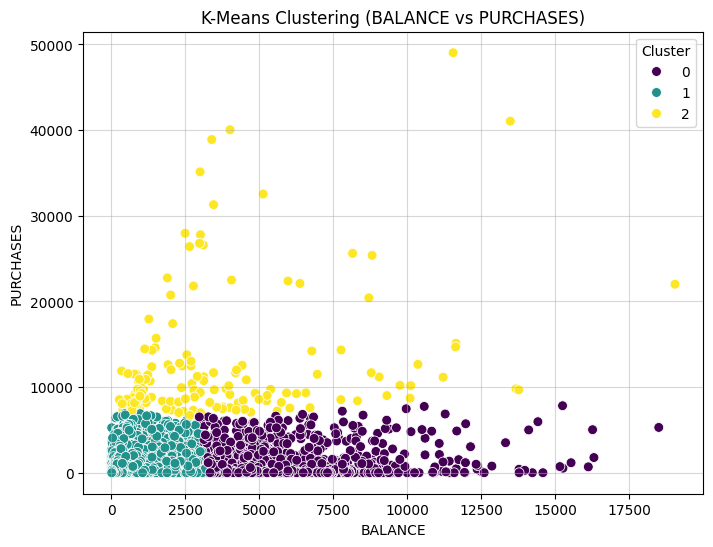

In [8]:
# Function 5: K-Means clustering with 3 clusters and scatter plot
def kmeans_clustering(data, features):
    X = data[features].dropna()
    kmeans = KMeans(n_clusters=3, random_state=42)
    data["Cluster"] = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=X, x=features[0], y=features[1], hue=data["Cluster"], palette="viridis", s=50)
    plt.title(f"K-Means Clustering ({features[0]} vs {features[1]})")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title="Cluster")
    plt.grid(alpha=0.5)
    plt.show()

kmeans_clustering(data, features_for_clustering)

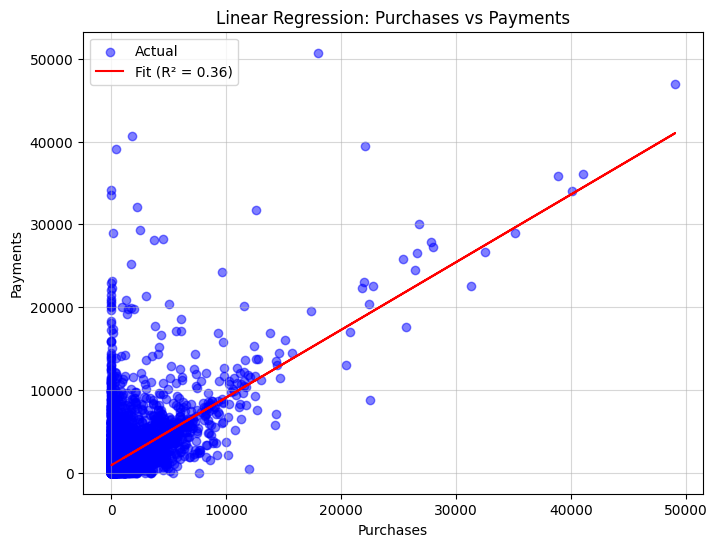

In [7]:
# Function 6: Linear regression for "PURCHASES" vs "PAYMENTS"
def linear_regression(data):
    X = data["PURCHASES"].values.reshape(-1, 1)
    y = data["PAYMENTS"].values
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label="Actual")
    plt.plot(X, y_pred, color='red', label=f"Fit (R² = {reg.score(X, y):.2f})")
    plt.title("Linear Regression: Purchases vs Payments")
    plt.xlabel("Purchases")
    plt.ylabel("Payments")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

linear_regression(data)